<a href="https://colab.research.google.com/github/LucasCabra7/Project-Encoding-and-Scaling/blob/main/Atividade_2_Encoding_e_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Encoding e Scaling

### Se o dataset possuir colunas nominais, criar versões codificadas:

- One-Hot encoding
- Dummy coding
- Effect coding

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Biblioteca para fazer a PADRONIZAÇÃO e/ou NORMALIZAÇÃO
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer

# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca para calcular a acuracia e f1-score
from sklearn.metrics import accuracy_score, f1_score

# Biblioteca para calcular regressão MAE e RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
# Instalando a biblioteca openml:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.6 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=e584ec738801d2203a9f12e7768f8a7d91da28c4c2f91d40f8e13b4e19a01f31
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


In [3]:
import openml

# Carregar o dataset pelo ID:
dataset = openml.datasets.get_dataset(37)
df_original, *_ = dataset.get_data()

In [4]:
df_original.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,tested_positive
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,tested_negative
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,tested_positive
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,tested_negative
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,tested_positive


No dataset escolhido `diabetes` única feature presente com valores nominmais é a features `class`. Dessa forma vamos dar inicio utilizando a codificação **One-Hot**.

**One-Hot** é um tipo de codificação utilizada para converter dados categóricos em formato binário, em que cada cagetoria é representada por uma coluna separada de 1 (TRUE) ou 0 (FALSE).

OBS_1: *É uma boa escolha quando a cardinalidade não for grande, ou seja, se não tiver muitos valores diferentes.*

OBS_2: *Essa abordagem pode criar problemas, pois pode sugerir uma ordem ou classificação entre categorias que não existe de fato.*

In [5]:
df_one_hot = df_original.join(pd.get_dummies(df_original['class'], dtype = 'int32', prefix = 'class'))

In [6]:
df_one_hot.sample(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class,class_tested_negative,class_tested_positive
397,0.0,131.0,66.0,40.0,0.0,34.3,0.196,22.0,tested_positive,0,1
74,1.0,79.0,75.0,30.0,0.0,32.0,0.396,22.0,tested_negative,1,0
605,1.0,124.0,60.0,32.0,0.0,35.8,0.514,21.0,tested_negative,1,0
688,1.0,140.0,74.0,26.0,180.0,24.1,0.828,23.0,tested_negative,1,0
628,5.0,128.0,80.0,0.0,0.0,34.6,0.144,45.0,tested_negative,1,0


**Dummy coding** é um tipo de codificação utilizada sempre que desejarmos incluir variáveis categóricas em modelos que aceitam apenas variáveis numéricas.

OBS_1: *Da mesma maneira que a One-Hot, mas remove uma coluna para evitar redundâncias (multicolinearidade).*

In [7]:
df_dummy = df_original.join(pd.get_dummies(df_original['class'], dtype='int32', prefix = 'class', drop_first=True))

In [8]:
df_dummy.sample(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class,class_tested_positive
139,5.0,105.0,72.0,29.0,325.0,36.9,0.159,28.0,tested_negative,0
58,0.0,146.0,82.0,0.0,0.0,40.5,1.781,44.0,tested_negative,0
204,6.0,103.0,72.0,32.0,190.0,37.7,0.324,55.0,tested_negative,0
399,3.0,193.0,70.0,31.0,0.0,34.9,0.241,25.0,tested_positive,1
445,0.0,180.0,78.0,63.0,14.0,59.4,2.420,25.0,tested_positive,1


**Effect coding** de maneira analoga a codificação Dummy, a única diferença é que grupo de comparação é identificado pelo valor -1.

In [9]:
effect = pd.get_dummies(df_original['class'], dtype='int32', prefix = 'class')
effect = effect.replace({0: -1}) # Substituir 0 por -1 para categoria base
effect = effect.drop('class_tested_negative', axis=1) # Remover a categoria de referência

df_effect = df_original.join(effect)

In [10]:
df_effect.sample(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class,class_tested_positive
153,1.0,153.0,82.0,42.0,485.0,40.6,0.687,23.0,tested_negative,-1
549,4.0,189.0,110.0,31.0,0.0,28.5,0.680,37.0,tested_negative,-1
425,4.0,184.0,78.0,39.0,277.0,37.0,0.264,31.0,tested_positive,1
127,1.0,118.0,58.0,36.0,94.0,33.3,0.261,23.0,tested_negative,-1
229,0.0,117.0,80.0,31.0,53.0,45.2,0.089,24.0,tested_negative,-1


Aplicar diferentes técnicas de normalização/padronização nas features numéricas:

- StandardScaler
- Min–Max Scaler
- MaxAbs Scaler
- Robust Scaler
- QuantileTransformer (uniforme e normal)

In [11]:
# Analisando resumo das medidas:
df_original.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


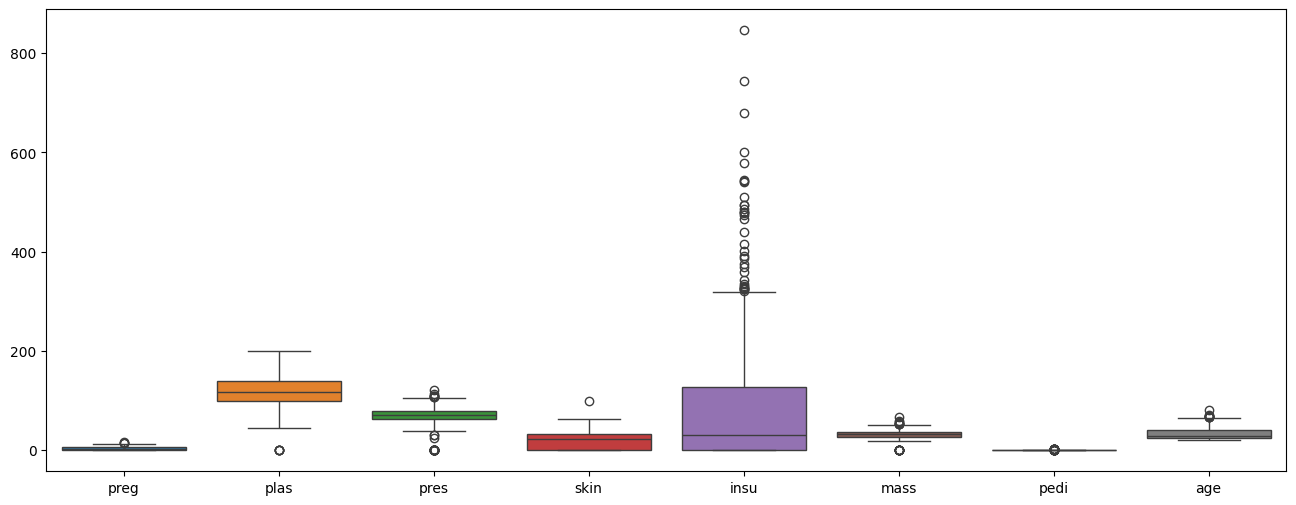

In [12]:
# Gerar um BoxPlot de todas as variáveis:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_original)

###PADRONIZAÇÃO utilizando StandardScaler:

In [13]:
# Criando um objeto para PADRONIZAÇÃO dos dados em colunas numéricas
obj_padronizacao_Standard = StandardScaler().fit(df_original.drop('class', axis=1))

In [14]:
# Aplicando a PADRONIZAÇÃO
df_padronizado_Standard = obj_padronizacao_Standard.transform(df_original.drop('class', axis=1))

In [15]:
# Array de dados:
df_padronizado_Standard

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
# Transformando para DataFrame:
df_padronizado_Standard = pd.DataFrame(df_padronizado_Standard, columns=df_original.drop('class', axis=1).columns)

df_padronizado_Standard.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [17]:
# Visualizar as medidas dos dados PADRONIZADOS
df_padronizado_Standard.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


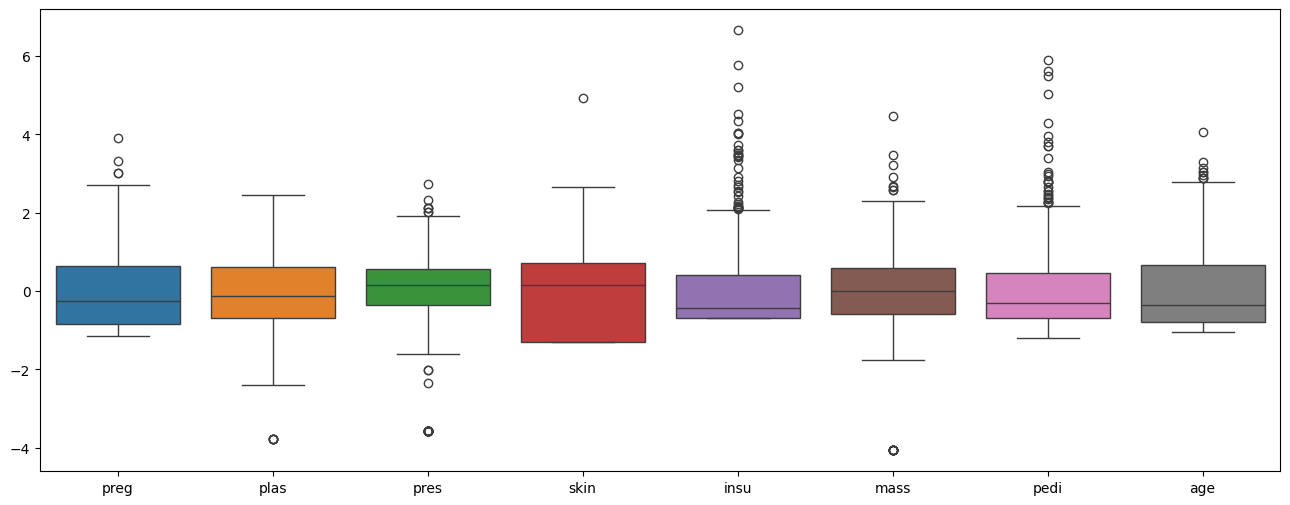

In [18]:
# Gerando BoxPlot dos dados padronizados
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_padronizado_Standard)

### NORMALIZAÇÃO utilizando Min–Max Scaler

In [19]:
# Criando um objeto para NORMALIZAR os dados:
obj_normalizacao = MinMaxScaler().fit(df_original.drop('class', axis=1))

In [20]:
# Aplicando a NORMALIZAÇÃO:
df_normalizado_min_max = obj_normalizacao.transform(df_original.drop('class', axis=1))

In [21]:
# Transformando para DataFrame:
df_normalizado_min_max = pd.DataFrame(df_normalizado_min_max, columns=df_original.drop('class', axis=1).columns)

df_normalizado_min_max.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [22]:
# Visualizando as medidas dos dados normalizados:
df_normalizado_min_max.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


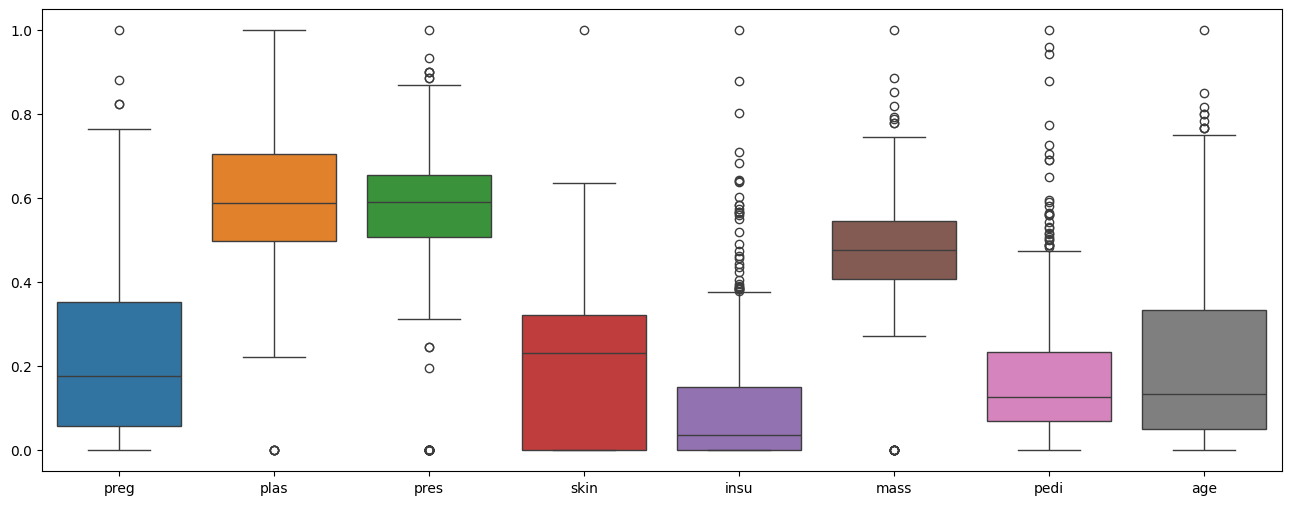

In [23]:
# BoxPlot dos dados Normalizados:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_normalizado_min_max)

### NORMALIZAÇÃO com MaxAbs Scaler

In [24]:
# Criando um objeto para NORMALIZAR os dados:
obj_normalizacao = MaxAbsScaler().fit(df_original.drop('class', axis=1))

In [25]:
# Aplicando a NORMALIZAÇÃO:
df_normalizado_maxabs = obj_normalizacao.transform(df_original.drop('class', axis=1))

In [26]:
# Transformando para DataFrame:
df_normalizado_maxabs = pd.DataFrame(df_normalizado_maxabs, columns=df_original.drop('class', axis=1).columns)

df_normalizado_maxabs.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407


In [27]:
# Visualizando as medidas dos dados normalizados:
df_normalizado_maxabs.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.194990,0.410381
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.136913,0.145188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032231,0.259259
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.100723,0.296296
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.153926,0.358025
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.258781,0.506173
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


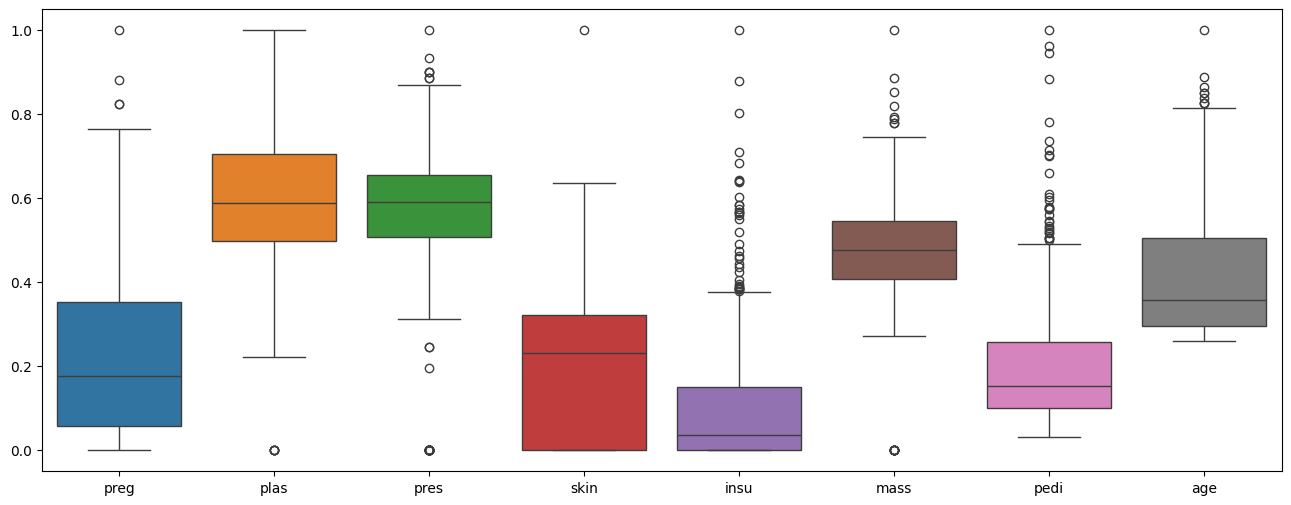

In [28]:
# BoxPlot dos dados normalizados:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_normalizado_maxabs)

###PADRONIZAÇÃO utilizando Robust Scaler

In [29]:
# Criando um objeto para PADRONIZAÇÃO dos dados em colunas numéricas
obj_padronizacao_robust = RobustScaler().fit(df_original.drop('class', axis=1))

In [30]:
# Aplicando a PADRONIZAÇÃO
df_padronizado_robust = obj_padronizacao_robust.transform(df_original.drop('class', axis=1))

In [31]:
# Transformando para DataFrame:
df_padronizado_robust = pd.DataFrame(df_padronizado_robust, columns=df_original.drop('class', axis=1).columns)

df_padronizado_robust.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294


In [32]:
# Visualizar as medidas dos dados PADRONIZADOS
df_padronizado_robust.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.169010,0.094413,-0.160807,-0.076986,0.387422,-0.000798,0.259807,0.249464
std,0.673916,0.775094,1.075323,0.498507,0.905650,0.847759,0.866219,0.691778
min,-0.600000,-2.836364,-4.000000,-0.718750,-0.239686,-3.440860,-0.769935,-0.470588
25%,-0.400000,-0.436364,-0.555556,-0.718750,-0.239686,-0.505376,-0.336601,-0.294118
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.563636,0.444444,0.281250,0.760314,0.494624,0.663399,0.705882
max,2.800000,1.987879,2.777778,2.375000,6.408644,3.774194,5.352941,3.058824


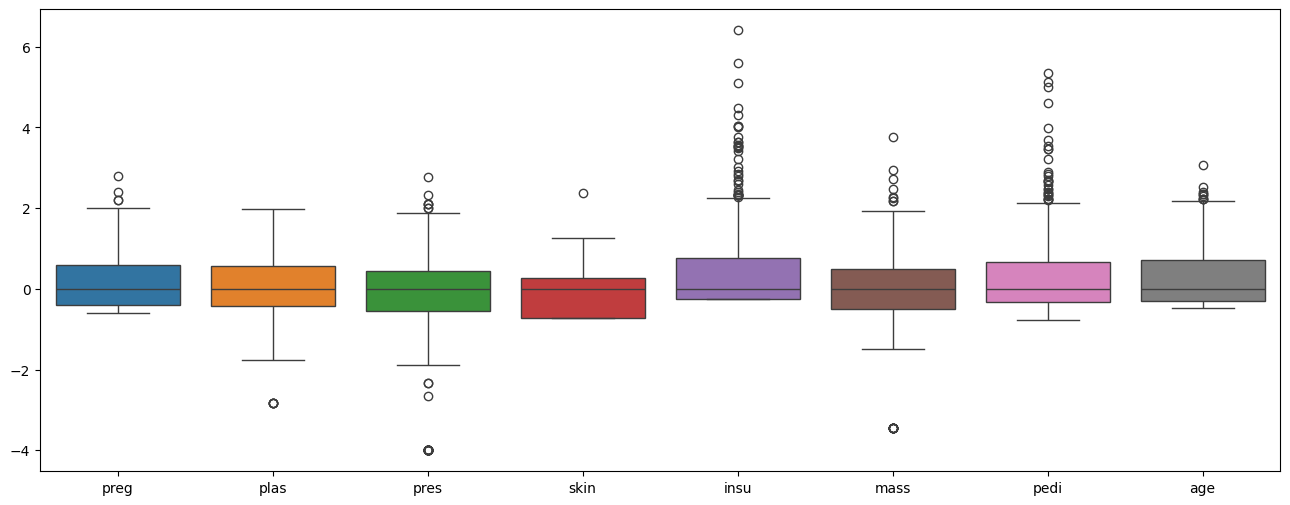

In [33]:
# BoxtPlot para os dados padronizados:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_padronizado_robust)

### Utilizando QuantileTransformer (uniforme e normal)

In [34]:
# Criar um objeto do QuantileTransformer com distribuição uniforme:
obj_quantile_uniform = QuantileTransformer(output_distribution='uniform').fit(df_original.drop('class', axis=1))

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


In [35]:
# Aplicar a transformação:
df_quantile_uniform = obj_quantile_uniform.transform(df_original.drop('class', axis=1))

In [36]:
# Converter para DataFrame:
df_quantile_uniform = pd.DataFrame(df_quantile_uniform, columns=df_original.drop('class', axis=1).columns)

df_quantile_uniform.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.750978,0.889831
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.475880,0.558670
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258


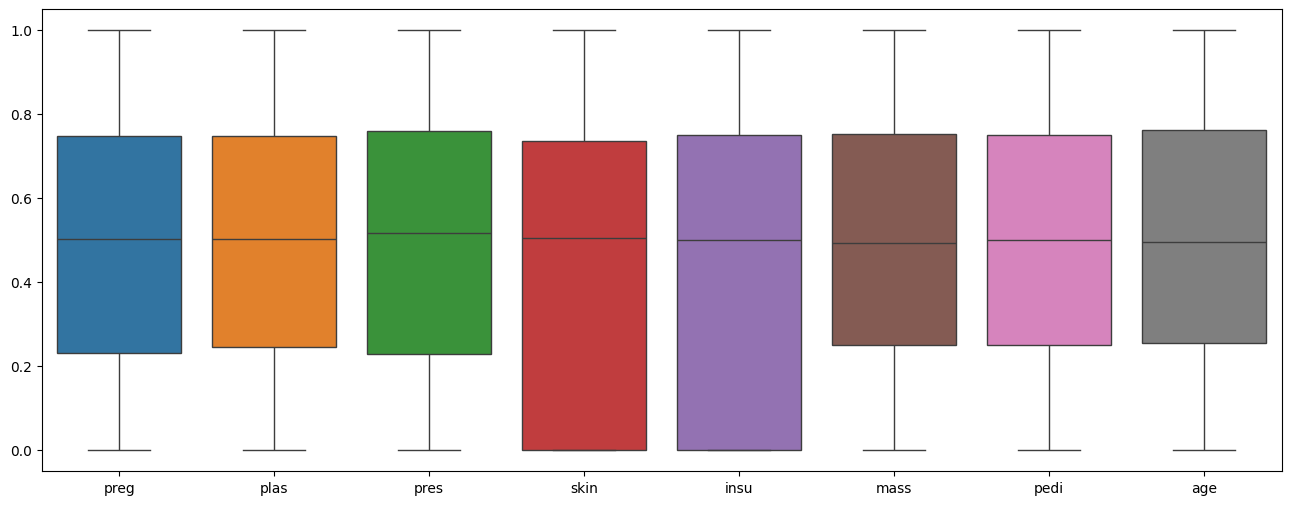

In [37]:
# BoxPlot da Transformação com Distribuição Uniforme:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_quantile_uniform)

In [38]:
# Criar o objeto do QuantileTransformer com Distribuição Normal:
obj_quantile_normal = QuantileTransformer(output_distribution='normal').fit(df_original.drop('class', axis=1))

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


In [39]:
# Aplicar Transformação:
df_quantile_normal = obj_quantile_normal.transform(df_original.drop('class', axis=1))

In [40]:
# Converter para DataFrame:
df_quantile_normal = pd.DataFrame(df_quantile_normal, columns=df_original.drop('class', axis=1).columns)

df_quantile_normal.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.667327,0.879002,0.042498,0.848159,-5.199338,0.230799,0.677570,1.225627
1,-0.729902,-1.294285,-0.422375,0.371103,-5.199338,-0.747073,-0.060497,0.147598
2,1.097346,1.716615,-0.585788,-5.199338,-5.199338,-1.329045,0.779878,0.215722
3,-0.729902,-1.121536,-0.422375,0.014707,0.420590,-0.528530,-1.246676,-5.199338
4,-5.199338,0.587729,-1.636692,0.848159,0.971779,1.453722,2.793437,0.269580


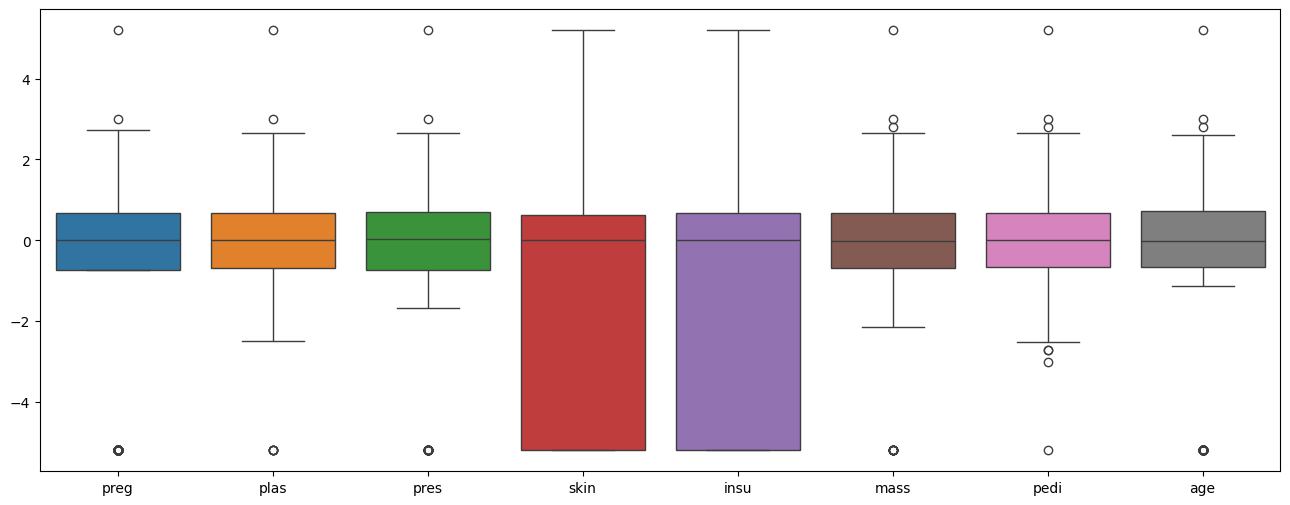

In [41]:
# BoxPlot da Transformação com Distribuição Normal:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_quantile_normal)

## Separar os dados em treino e teste (70% treino / 30% teste). Treinar e avaliar o KNN em cada cenário utilizando o valor padrão de k do scikit-learn (n neighbors=5).

### Treino e Teste para Standard

**CLASSIFICAÇÃO:**

In [42]:
# Variável Target
df_original_target = df_original['class']

# Separando os dados em TREINO e TESTE (para Standard)
# 70% TREINO E 30% TESTE
X_train, X_test, y_train, y_test = train_test_split(df_padronizado_Standard, df_original_target, test_size=0.3, random_state=10)

In [43]:
# KNN
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train, y_train)

resultados = knn.predict(X_test)

In [45]:
# Accuracy Score para Standard
score_Standard = accuracy_score(y_test, resultados)
print(f"Quantos porcentos meu modelo preditivo acertou - Accuracy: {score_Standard}")

# F1-score para Standard
f1_score_Standard = f1_score(y_test, resultados, pos_label='tested_positive')
print(f"F1-score: {f1_score_Standard}")

Quantos porcentos meu modelo preditivo acertou - Accuracy: 0.6666666666666666
F1-score: 0.4689655172413793


**REGRESSÃO:**

In [46]:
X = df_padronizado_Standard # Variáveis preditoras
y = df_dummy['class_tested_positive'] # Variavel alvo utilizando o dataset Dummy

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [48]:
# KNN de Regressão
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

# Previsões
y_pred = knn_reg.predict(X_test)

In [49]:
mae_Standard = mean_absolute_error(y_test, y_pred)
rmse_Standard = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE Standard: {mae_Standard}')
print(f'RMSE Standard: {rmse_Standard}')

MAE Standard: 0.34718614718614726
RMSE Standard: 0.46131751843372787


### Treino e Teste para Min–Max Scaler:

**CLASSIFICAÇÃO:**

In [50]:
# Variável Target
df_original_target = df_original['class']

# Separando os dados em TREINO e TESTE (para Min–Max Scaler)
# 70% TREINO E 30% TESTE
X_train, X_test, y_train, y_test = train_test_split(df_normalizado_min_max, df_original_target, test_size=0.3, random_state=10)

In [51]:
#KNN
knn.fit(X_train, y_train)

resultados = knn.predict(X_test)

In [52]:
# Accuracy Score para Min–Max Scaler
score_min_max = accuracy_score(y_test, resultados)
print(f"Quantos porcentos meu modelo preditivo acertou - Accuracy: {score_min_max}")

# F1-score para Min–Max Scaler
f1_score_min_max = f1_score(y_test, resultados, pos_label='tested_positive')
print(f"F1-score: {f1_score_min_max}")

Quantos porcentos meu modelo preditivo acertou - Accuracy: 0.683982683982684
F1-score: 0.496551724137931


**REGRESSÃO:**

In [53]:
X = df_normalizado_min_max # Variáveis preditoras
y = df_dummy['class_tested_positive'] # Variavel alvo utilizando o dataset Dummy

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [55]:
# KNN de Regressão
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

# Previsões
y_pred = knn_reg.predict(X_test)

In [56]:
mae_Min_Max = mean_absolute_error(y_test, y_pred)
rmse_Min_Max = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE Min-Max: {mae_Min_Max}')
print(f'RMSE Min-Max: {rmse_Min_Max}')

MAE Min-Max: 0.3437229437229438
RMSE Min-Max: 0.45679099012350133


### Treino e Teste para MaxAbs Scaler

CLASSIFICAÇÃO:

In [57]:
# Variável Target
df_original_target = df_original['class']

# Separando os dados em TREINO e TESTE Max-ABS Scaler
# 70% TREINO E 30% TESTE
X_train, X_test, y_train, y_test = train_test_split(df_normalizado_maxabs, df_original_target, test_size=0.3, random_state=10)

In [58]:
#KNN
knn.fit(X_train, y_train)

resultados = knn.predict(X_test)

In [59]:
# Accuracy Score para Max-ABS Scaler
score_maxabs = accuracy_score(y_test, resultados)
print(f"Quantos porcentos meu modelo preditivo acertou - Accuracy: {score_maxabs}")

# F1-score para Max-ABS Scaler
f1_score_maxabs = f1_score(y_test, resultados, pos_label='tested_positive')
print(f"F1-score: {f1_score_maxabs}")

Quantos porcentos meu modelo preditivo acertou - Accuracy: 0.6883116883116883
F1-score: 0.52


REGRESSÃO:

In [60]:
X = df_normalizado_maxabs # Variáveis preditoras
y = df_dummy['class_tested_positive'] # Variavel alvo utilizando o dataset Dummy

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [62]:
# KNN de Regressão
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

# Previsões
y_pred = knn_reg.predict(X_test)

In [63]:
mae_max_abs = mean_absolute_error(y_test, y_pred)
rmse_max_abs = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE Max-ABS: {mae_max_abs}')
print(f'RMSE Max-ABS: {rmse_max_abs}')

MAE Max-ABS: 0.34112554112554117
RMSE Max-ABS: 0.45660141095363305


###Teste e Treinamento para Robust Scaler

**CLASSIFICAÇÃO:**

In [64]:
# Variável Target
df_original_target = df_original['class']

# Separando os dados em TREINO e TESTE (para Robust Scaler)
# 70% TREINO E 30% TESTE
X_train, X_test, y_train, y_test = train_test_split(df_padronizado_robust, df_original_target, test_size=0.3, random_state=10)

In [65]:
#KNN
knn.fit(X_train, y_train)

resultados = knn.predict(X_test)

In [66]:
# Accuracy Score para Robust Scaler
score_robust = accuracy_score(y_test, resultados)
print(f"Quantos porcentos meu modelo preditivo acertou - Accuracy: {score_robust}")

# F1-score para Robus Scaler
f1_score_robust = f1_score(y_test, resultados, pos_label='tested_positive')
print(f"F1-score: {f1_score_robust}")

Quantos porcentos meu modelo preditivo acertou - Accuracy: 0.7056277056277056
F1-score: 0.5342465753424658


**REGRESSÃO:**

In [67]:
X = df_padronizado_robust # Variáveis preditoras
y = df_dummy['class_tested_positive'] # Variavel alvo utilizando o dataset Dummy

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [69]:
# KNN de Regressão
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

# Previsões
y_pred = knn_reg.predict(X_test)

In [70]:
mae_robust = mean_absolute_error(y_test, y_pred)
rmse_robust = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE Robust Scaler: {mae_robust}')
print(f'RMSE Robust Scaler: {rmse_robust}')

MAE Robust Scaler: 0.3341991341991343
RMSE Robust Scaler: 0.4535573676110727


### Teste e Treino para QuantileTransformer (uniforme e normal):

**CLASSIFICAÇÃO - UNIFOME:**

In [71]:
# Variável Target
df_original_target = df_original['class']

# Separando os dados em TREINO e TESTE (para QuantileTransformer - UNIFORME)
# 70% TREINO E 30% TESTE
X_train, X_test, y_train, y_test = train_test_split(df_quantile_uniform, df_original_target, test_size=0.3, random_state=10)

In [72]:
#KNN
knn.fit(X_train, y_train)

resultados = knn.predict(X_test)

In [73]:
# Accuracy Score para  QuantileTransformer - UNIFORME
score_Qtl_Uniform = accuracy_score(y_test, resultados)
print(f"Quantos porcentos meu modelo preditivo acertou - Accuracy: {score_Qtl_Uniform}")

# F1-score para  QuantileTransformer - UNIFORME
f1_score_Qtl_Uniform = f1_score(y_test, resultados, pos_label='tested_positive')
print(f"F1-score - QuantileTransformer - UNIFORME: {f1_score_Qtl_Uniform}")

Quantos porcentos meu modelo preditivo acertou - Accuracy: 0.7359307359307359
F1-score - QuantileTransformer - UNIFORME: 0.5960264900662252


**CLASSIFICAÇÃO - NORMAL:**

In [74]:
# Variável Target
df_original_target = df_original['class']

# Separando os dados em TREINO e TESTE (para QuantileTransformer - NORMAL)
# 70% TREINO E 30% TESTE
X_train, X_test, y_train, y_test = train_test_split(df_quantile_normal, df_original_target, test_size=0.3, random_state=10)

In [75]:
knn.fit(X_train, y_train)

resultados = knn.predict(X_test)

In [76]:
# Accuracy Score para  QuantileTransformer - NORMAL
score_Qtl_Normal= accuracy_score(y_test, resultados)
print(f"Quantos porcentos meu modelo preditivo acertou - Accuracy: {score_Qtl_Normal}")

# F1-score para  QuantileTransformer - NORMAL
f1_score_Qtl_Normal = f1_score(y_test, resultados, pos_label='tested_positive')
print(f"F1-score - QuantileTransformer - NORMAL: {f1_score_Qtl_Normal}")

Quantos porcentos meu modelo preditivo acertou - Accuracy: 0.70995670995671
F1-score - QuantileTransformer - NORMAL: 0.5562913907284768


**REGRESSÃO - UNIFORME:**

In [77]:
X = df_quantile_uniform # Variáveis preditoras
y = df_dummy['class_tested_positive'] # Variavel alvo utilizando o dataset Dummy

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [79]:
# KNN de Regressão
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

# Previsões
y_pred = knn_reg.predict(X_test)

In [80]:
mae_quantile_uniform = mean_absolute_error(y_test, y_pred)
rmse_quantile_uniform = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE -> QuantileTransformer - UNIFORME: {mae_quantile_uniform}')
print(f'RMSE -> QuantileTransformer - UNIFORME: {rmse_quantile_uniform}')

MAE -> QuantileTransformer - UNIFORME: 0.3385281385281386
RMSE -> QuantileTransformer - UNIFORME: 0.43703051494795075


**REGESSÃO - NORMAL:**

In [81]:
X = df_quantile_normal # Variáveis preditoras
y = df_dummy['class_tested_positive'] # Variavel alvo utilizando o dataset Dummy

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [83]:
# KNN de Regressão
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

# Previsões
y_pred = knn_reg.predict(X_test)

In [84]:
mae_quantile_Normal = mean_absolute_error(y_test, y_pred)
rmse_quantile_Normal = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE -> QuantileTransformer - NORMAL: {mae_quantile_Normal}')
print(f'RMSE -> QuantileTransformer - NORMAL: {rmse_quantile_Normal}')

MAE -> QuantileTransformer - NORMAL: 0.35757575757575766
RMSE -> QuantileTransformer - NORMAL: 0.45830480037120497


### Gerando gráficos para interpretar os resultados do KNN - Modelos de CLASSIFICAÇÃO:

In [85]:
# Lista de Resultados:
acuracias = {
    'Standard': score_Standard,
    'Min-Max': score_min_max,
    'Max-ABS': score_maxabs,
    'Robust': score_robust,
    'QTL Uniforme': score_Qtl_Uniform,
    'QTL Normal': score_Qtl_Normal
}

f1_scores = {
    'Standard': f1_score_Standard,
    'Min-Max': f1_score_min_max,
    'Max-ABS': f1_score_maxabs,
    'Robust': f1_score_robust,
    'QTL Uniforme': f1_score_Qtl_Uniform,
    'QTL Normal': f1_score_Qtl_Normal
}


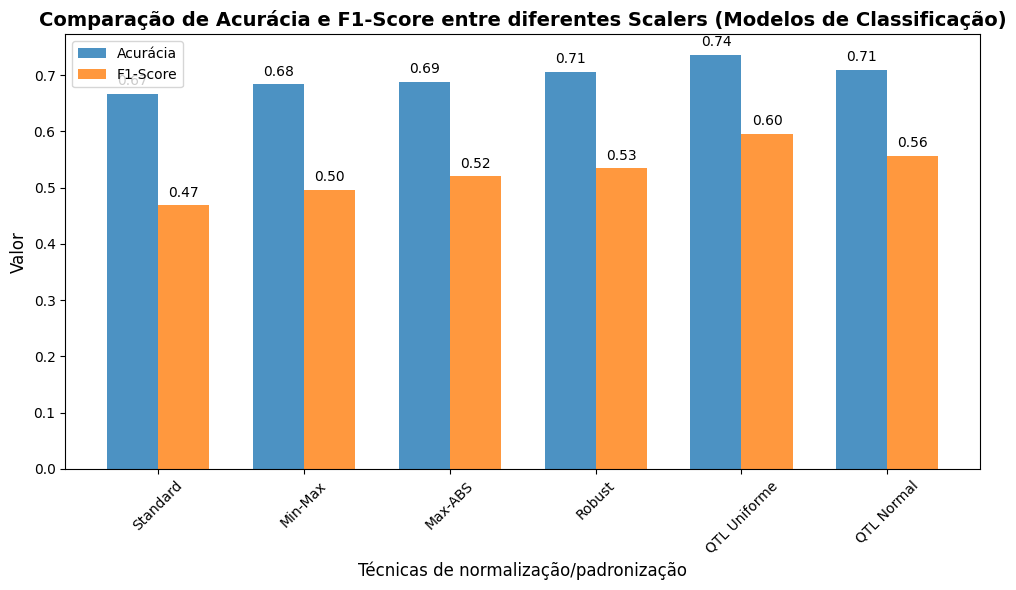

In [86]:
# Gerar gráfico de barras comparando ACURACIAS e F1-SCORE entre os diferentes Treino e Testes:

labels = list(acuracias.keys())
x = np.arange(len(labels))
largura = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
barras1 = ax.bar(x - largura/2, acuracias.values(), largura, label='Acurácia', alpha=0.8)
barras2 = ax.bar(x + largura/2, f1_scores.values(), largura, label='F1-Score', alpha=0.8)

# Rótulos e formatações:
ax.set_xlabel('Técnicas de normalização/padronização', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Comparação de Acurácia e F1-Score entre diferentes Scalers (Modelos de Classificação)', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# Mostrar valores acima das barras:
for barras in [barras1, barras2]:
    for barra in barras:
        yval = barra.get_height()
        ax.text(barra.get_x() + barra.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Gerando gráficos para interpretar os resultados do KNN - Modelos de REGRESSÃO:

In [87]:
mae = {
    'Standard': mae_Standard,
    'Min-Max': mae_Min_Max,
    'Max-ABS': mae_max_abs,
    'Robust': mae_robust,
    'QTL Uniforme': mae_quantile_uniform,
    'QTL Normal': mae_quantile_Normal
}

rmse = {
    'Standard': rmse_Standard,
    'Min-Max': rmse_Min_Max,
    'Max-ABS': rmse_max_abs,
    'Robust': rmse_robust,
    'QTL Uniforme': rmse_quantile_uniform,
    'QTL Normal': rmse_quantile_Normal
}

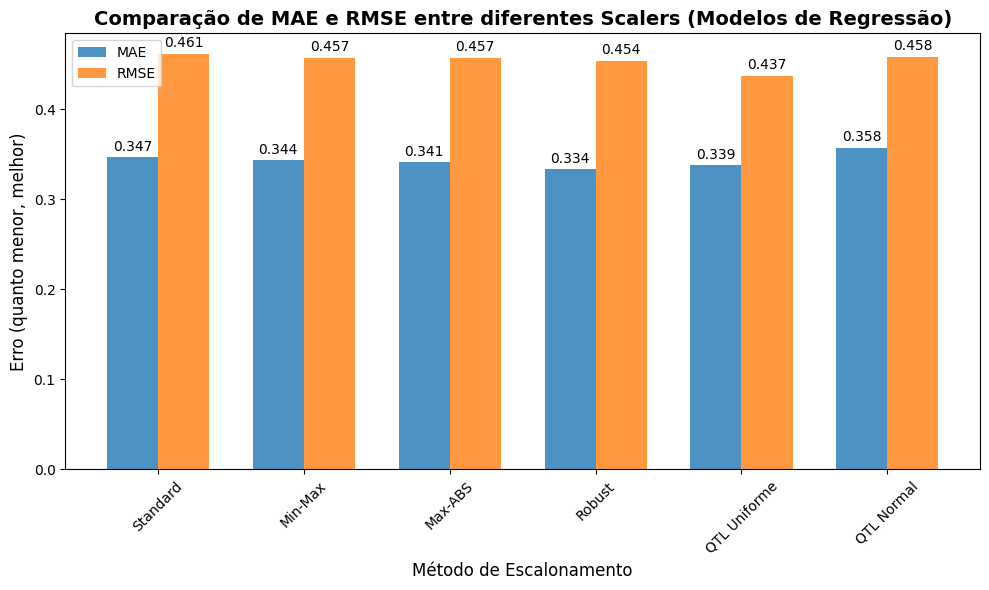

In [88]:
# Configuração do gráfico
labels = list(mae.keys())
x = np.arange(len(labels))
largura = 0.35  # largura das barras

fig, ax = plt.subplots(figsize=(10, 6))
barras1 = ax.bar(x - largura/2, mae.values(), largura, label='MAE', alpha=0.8)
barras2 = ax.bar(x + largura/2, rmse.values(), largura, label='RMSE', alpha=0.8)

# Rótulos e formatações
ax.set_xlabel('Método de Escalonamento', fontsize=12)
ax.set_ylabel('Erro (quanto menor, melhor)', fontsize=12)
ax.set_title('Comparação de MAE e RMSE entre diferentes Scalers (Modelos de Regressão)', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# Mostrar valores acima das barras
for barras in [barras1, barras2]:
    for bar in barras:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + (0.01 * yval), f'{yval:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

###